In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [10]:
#run once
data = pd.read_csv('all_synthetic_data2.csv')

In [ ]:
#run only once
sampled_df = data.sample(n=300_000, random_state=42).reset_index(drop=True)


sampled_df.to_csv("sampled_synthetic_data.csv", index=False)

In [3]:
sampled_data = pd.read_csv('sampled_synthetic_data.csv')
D = sampled_data.to_numpy()
D = np.delete(D, 3, axis=1)

In [ ]:
import importlib
import ndlr3
importlib.reload(ndlr3)

from ndlr3 import NDLR
theta_c = NDLR(D, 0.05, 0.1, 1.5)

❌ Rejected theta=[-0.00976516] → Penalty=4.170238, UB=2.020238 > epsilon=0.1
❌ Rejected theta=[-0.01025342] → Penalty=4.171209, UB=2.021209 > epsilon=0.1
❌ Rejected theta=[-0.0092769] → Penalty=4.169266, UB=2.019266 > epsilon=0.1
❌ Rejected theta=[-0.00878864] → Penalty=4.168294, UB=2.018294 > epsilon=0.1
❌ Rejected theta=[-0.00781213] → Penalty=4.166350, UB=2.016350 > epsilon=0.1
❌ Rejected theta=[-0.00683561] → Penalty=4.164406, UB=2.014406 > epsilon=0.1
❌ Rejected theta=[-0.00488258] → Penalty=4.160518, UB=2.010518 > epsilon=0.1
❌ Rejected theta=[-0.00292955] → Penalty=4.156630, UB=2.006630 > epsilon=0.1
❌ Rejected theta=[0.00097652] → Penalty=4.148854, UB=1.998854 > epsilon=0.1
❌ Rejected theta=[0.00488258] → Penalty=4.141078, UB=1.991078 > epsilon=0.1
❌ Rejected theta=[0.0126947] → Penalty=4.125526, UB=1.975526 > epsilon=0.1
❌ Rejected theta=[0.02050683] → Penalty=4.109975, UB=1.959975 > epsilon=0.1
❌ Rejected theta=[0.03613108] → Penalty=4.078871, UB=1.928871 > epsilon=0.1
❌ Reje

array([0.95484932])

In [11]:
#run only once
sampled_df_500 = data.sample(n=500_000, random_state=42).reset_index(drop=True)


sampled_df_500.to_csv("sampled_synthetic_data_500.csv", index=False)

In [ ]:
sampled_data_500 = pd.read_csv('sampled_synthetic_data_500.csv')
D_500 = sampled_data_500.to_numpy()
D_500 = np.delete(D_500, 3, axis=1)

In [9]:
sampled_data_500[sampled_data_500['T'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250158 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           250158 non-null  float64
 1   Y           250158 non-null  float64
 2   T           250158 non-null  int64  
 3   Dataset_ID  250158 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 MB


In [ ]:
import importlib
import ndlr
importlib.reload(ndlr)
#Do not run again - for reproducibility
from ndlr import NDLR
theta_c = NDLR(D_500, 0.05, 0.1, 1.5)
theta_c

❌ Rejected theta=[0.00654535] → Penalty=4.147194, UB=1.997194 > epsilon=0.1
❌ Rejected theta=[0.00687261] → Penalty=4.146539, UB=1.996539 > epsilon=0.1
❌ Rejected theta=[0.00719988] → Penalty=4.145884, UB=1.995884 > epsilon=0.1
❌ Rejected theta=[0.00752715] → Penalty=4.145230, UB=1.995230 > epsilon=0.1
❌ Rejected theta=[0.00818168] → Penalty=4.143920, UB=1.993920 > epsilon=0.1
❌ Rejected theta=[0.00883622] → Penalty=4.142611, UB=1.992611 > epsilon=0.1
❌ Rejected theta=[0.01014529] → Penalty=4.139992, UB=1.989992 > epsilon=0.1
❌ Rejected theta=[0.01145435] → Penalty=4.137373, UB=1.987373 > epsilon=0.1
❌ Rejected theta=[0.01407249] → Penalty=4.132135, UB=1.982135 > epsilon=0.1
❌ Rejected theta=[0.01669063] → Penalty=4.126897, UB=1.976897 > epsilon=0.1
❌ Rejected theta=[0.02192691] → Penalty=4.116421, UB=1.966421 > epsilon=0.1
❌ Rejected theta=[0.02716318] → Penalty=4.105946, UB=1.955946 > epsilon=0.1
❌ Rejected theta=[0.03763574] → Penalty=4.084994, UB=1.934994 > epsilon=0.1
❌ Rejected t

array([0.95488412])

In [ ]:
theta_c = 0.95488412

In [ ]:
def predict(X, theta):
    return X * theta[0]  


In [23]:
X = np.array([x for x, _, _ in D_500])
Y = np.array([y for _, y, _ in D_500])
T = np.array([t for _, _, t in D_500])

In [24]:
Y_pred = predict(X, theta_c)

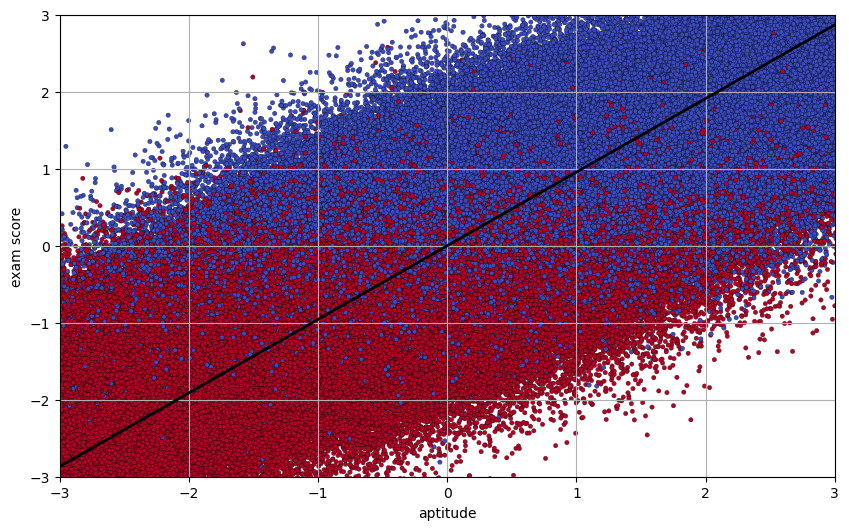

In [ ]:
plt.figure(figsize=(10, 6)) 

# Scatter plot with small, sharp, color-coded data points
plt.scatter(
    X, 
    Y, 
    c=T, 
    cmap='coolwarm',
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Plot regression line using optimal theta
x_line = np.linspace(-3, 3, 1000)
y_line = theta_c * x_line
plt.plot(x_line, y_line, color='black', linewidth=2)

# Plot settings
plt.title('')
plt.xlabel('aptitude')
plt.ylabel('exam score')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()


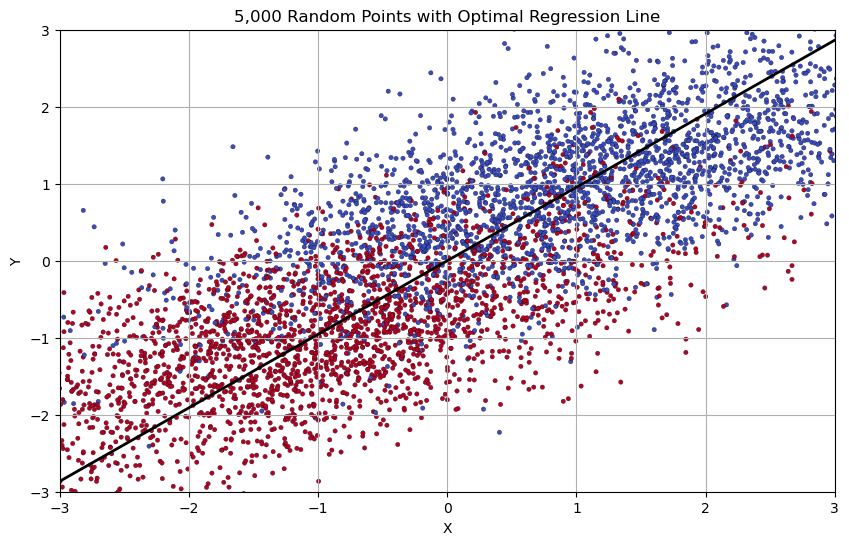

In [20]:
indices = np.random.choice(len(X), size=5000, replace=False)

# Subset the data
X_subset = X[indices]
Y_subset = Y[indices]
T_subset = T[indices]

# Plot
plt.figure(figsize=(10, 6)) 

plt.scatter(
    X_subset, 
    Y_subset, 
    c=T_subset, 
    cmap='coolwarm',
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Regression line
x_line = np.linspace(-3, 3, 1000)
y_line = theta_c * x_line
plt.plot(x_line, y_line, color='black', linewidth=2)

# Plot settings
plt.title('5,000 Random Points with Optimal Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()

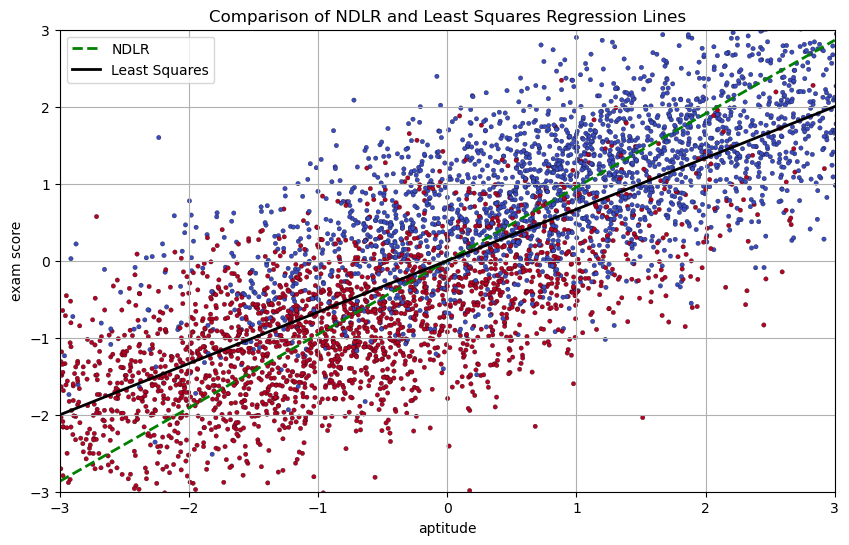

In [28]:
# Step 1: Compute least squares theta
# X_full needs to be 2D for lstsq
X_2d = X.reshape(-1, 1)
X_with_bias = np.hstack([np.ones_like(X_2d), X_2d])  # add intercept
theta_ls, _, _, _ = np.linalg.lstsq(X_with_bias, Y, rcond=None)

# Step 2: Take a random sample of 5,000 points
np.random.seed(42)  # for reproducibility
indices = np.random.choice(len(X), size=5000, replace=False)
X_subset = X[indices]
Y_subset = Y[indices]
T_subset = T[indices]

# Step 3: Plot everything
plt.figure(figsize=(10, 6)) 

# Plot 5,000 points
scatter = plt.scatter(
    X_subset, 
    Y_subset, 
    c=T_subset, 
    cmap='coolwarm', 
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Plot regression lines
x_line = np.linspace(-3, 3, 1000)

# Optimal theta line
y_opt = theta_c * x_line
plt.plot(x_line, y_opt, color='green', linestyle='--', linewidth=2, label='NDLR')

# Least squares line
y_ls = theta_ls[0] + theta_ls[1] * x_line
plt.plot(x_line, y_ls, color='black', linewidth=2, label='Least Squares')

# Final plot settings
plt.title('Comparison of NDLR and Least Squares Regression Lines')
plt.xlabel('aptitude')
plt.ylabel('exam score')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Function to compute discrimination statistic d(θ)
def compute_discrimination_statistic_NDLR(X,Y,T, theta_c):
    """Computes d(θ) as the difference in mean prediction errors between T=0 and T=1."""
    group_A_mask = T == 0
    group_B_mask = T == 1

    y_pred = theta_c * X

    # Group-wise predictions and true values
    y_A_pred = y_pred[group_A_mask]
    y_B_pred = y_pred[group_B_mask]     
    # True values
    y_A_true = Y[group_A_mask]
    y_B_true = Y[group_B_mask]

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred - y_A_true)
    mean_B = np.mean(y_B_pred - y_B_true)

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [31]:
d_theta_ndlr = compute_discrimination_statistic_NDLR(X,Y,T, theta_c)
d_theta_ndlr

-0.09087228438710357